Name: Parker Gage

Library: Pytorch

URL: https://github.com/Parker2025/Pytorch

Description: Pytorch is one of the most popular machine learning libraries for python.  It allows data scientists to load data, process data, train models, optimize and refine models, and to evaluate model performance.  Pytorch does this all while being open source and free to use. The following code is an example of the capabilities of Pytorch focusing on computer vision.  

First, we will download the dataset from torchvision.  SVHN is a dataset which stands for Street View House Numbers.
 * DataLoader is what allows us to import the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn
import torch.optim as optim
import torchvision.models as tmodel

from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import SVHN
from torchvision.models import EfficientNet_B0_Weights

Next, is preprocessing the data:
* Transforming the data into a tensor, while normalizing the type of data that we will have, can also change the resolution of the image.
* The second step is setting up a training dataset and test dataset.
  

In [3]:
normalizesvhn = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean = [.5,.5,.5], std = [.5,.5,.5])])

In [5]:
trainingdata = SVHN(root = "./data", split="train", download = True,transform = normalizesvhn)
testdata = SVHN(root = "./data", split="test", download = True, transform = normalizesvhn)

This step indicates how many photos are in each batch. Here it's 32 and then for the training data we shuffle the images.  This helps to make sure we don't overfit our model. 

In [6]:
training = DataLoader(trainingdata, batch_size = 32, shuffle = True)
test = DataLoader(testdata, batch_size = 32, shuffle = False)

How to look at a tensor

In [7]:
trainingtensor = iter(training)
images, labels= next(trainingtensor)

print("Tensor Values", images[:5])


Tensor Values tensor([[[[-0.5451, -0.5373, -0.4980,  ..., -0.6392, -0.6392, -0.6471],
          [-0.5137, -0.5373, -0.5216,  ..., -0.5922, -0.5843, -0.6392],
          [-0.4275, -0.5686, -0.6000,  ..., -0.6235, -0.6000, -0.6549],
          ...,
          [-0.2863, -0.2549, -0.2706,  ..., -0.3882, -0.4353, -0.4039],
          [-0.2078, -0.2235, -0.2706,  ..., -0.4353, -0.4510, -0.3725],
          [-0.1843, -0.2549, -0.3098,  ..., -0.3725, -0.3412, -0.3020]],

         [[-0.4902, -0.5216, -0.5529,  ..., -0.5529, -0.5686, -0.5765],
          [-0.4980, -0.5137, -0.5608,  ..., -0.5765, -0.5216, -0.5216],
          [-0.5216, -0.5059, -0.5216,  ..., -0.5686, -0.5373, -0.5294],
          ...,
          [-0.2627, -0.3255, -0.3647,  ..., -0.3961, -0.4196, -0.3961],
          [-0.2549, -0.3020, -0.3412,  ..., -0.3882, -0.3882, -0.3961],
          [-0.2706, -0.2941, -0.3255,  ..., -0.4118, -0.4196, -0.4196]],

         [[-0.6863, -0.6863, -0.5686,  ..., -0.6941, -0.7098, -0.6706],
          [-0.65

In [11]:
print("Shape of first 5 Images:", images[:5].shape)
print("Shape of first 5 Labels:", labels[:5].shape)

Shape of first 5 Images: torch.Size([5, 3, 32, 32])
Shape of first 5 Labels: torch.Size([5])


These numbers don't look like a picture. How could we see the actual image?


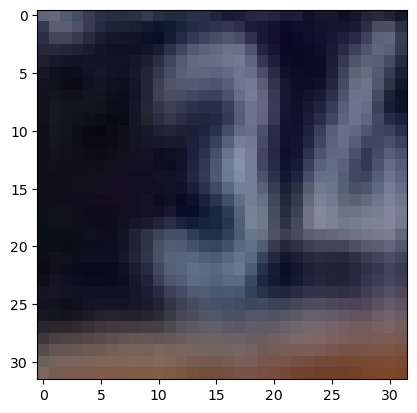

In [13]:
picture = images[1]
picture = picture.permute(1,2,0) # permute is part of the torch library. When you input into a tensor it changes the data order.
picture = picture * .5 + .5 #have to remove the normalization
plt.imshow(picture)



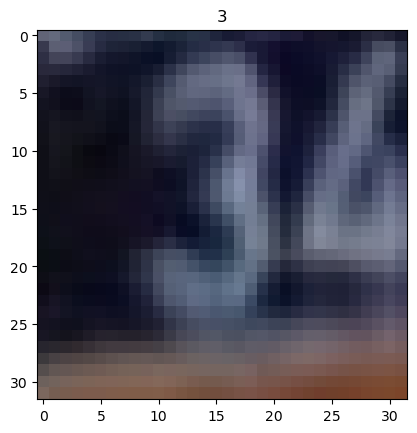

In [15]:
plt.imshow(picture)
plt.title(labels[1].item());

Below is the model that was selected efficientnet_b0. This is directly from torchvision.models.
* The model is light, which is important since I'm not using a gpu to train the model.
* 1280 refers to how many neurons are on the last layer of the model.
* 10 refers to how many outputs. Since SVHN classifies one number 0-9 we select that there are 10 options.
  

In [17]:
model = tmodel.efficientnet_b0(weights = EfficientNet_B0_Weights.DEFAULT)
model.classifier[1] = torch.nn.Linear(1280,10)  # This step we're taking a great funcitioning model and customizing it a little for our needs. 
##10 represents the out_features and 1280 represents number of neurons for the in_feature




Criterion is associated with the loss function of the model. 
* In this step it looks at the model performance through a loss function.
* lr is learning rate. This helps tune how much the model can change.
* momentum helps the optimizer along.

In [19]:
criterion = torch.nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


If you had a GPU you could assign the model to run on a GPU for faster training. 

In [21]:
cpu = torch.device("cpu")
model.to(cpu)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

Ideally we'd like to run more than one epoch (how many times the model trains), but it takes a very long time to run on a cpu.

In [23]:
rounds = 1

for epoch in range(rounds):
    model.train() #sets the model to training mode
    runningloss = 0
    runningcorrect = 0
    total = 0
    
    for images, labels in training:
        images, labels = images.to(cpu), labels.to(cpu) #specifies what device to run on
        optimizer.zero_grad() #helps with backward propogation
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total += labels.size(0)
        runningloss += loss.item()
        runningcorrect += torch.sum(predicted == labels).item()
            
print(f"Loss: {runningloss / len(training)}")
print(f"Accuracy: {runningcorrect / total *100}%")

Loss: 1.2500577762527758
Accuracy: 57.527608283167474%


Evaluation

Let's see some examples of what we predicted and what we should've seen.

In [25]:
model.eval() #turns the model into eval mode


correct = 0
total = 0

with torch.no_grad():
    for images, labels in test:
        images, labels = images.to("cpu"), labels.to("cpu") #specifying what device to run on
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0) # calculates how many images it's been trained on.
        correct += (predicted == labels).sum().item() # counts how many it's predicted correctly

print(f"Accuracy: {100 * correct / total}%")



Accuracy: 81.13859864781807%


In [27]:
images, labels = next(iter(test))
visualization = model(images)
_, predictions = torch.max(visualization, 1) #_, is there because of the torch.max

for loop in range(32):
    print(f"Dataset Label: {labels[loop].item()} Vs. Prediction: {predictions[loop].item()}")

Dataset Label: 5 Vs. Prediction: 5
Dataset Label: 2 Vs. Prediction: 2
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 0 Vs. Prediction: 0
Dataset Label: 6 Vs. Prediction: 0
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 9 Vs. Prediction: 9
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 8 Vs. Prediction: 8
Dataset Label: 3 Vs. Prediction: 3
Dataset Label: 6 Vs. Prediction: 5
Dataset Label: 5 Vs. Prediction: 3
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 4 Vs. Prediction: 4
Dataset Label: 4 Vs. Prediction: 4
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 6 Vs. Prediction: 6
Dataset Label: 3 Vs. Prediction: 3
Dataset Label: 4 Vs. Prediction: 4
Dataset Label: 2 Vs. Prediction: 2
Dataset Label: 0 Vs. Prediction: 0
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 3 Vs. Prediction: 3
Dataset Label: 2 Vs. Prediction: 2
Dataset Label: 5 Vs. Prediction: 5
Dataset Label: 4 Vs. Prediction: 4
Dataset Label: 1 Vs. Prediction: 1
Dataset Label: 4 Vs.

Let's look at the ones that the model predicted incorrectly. 

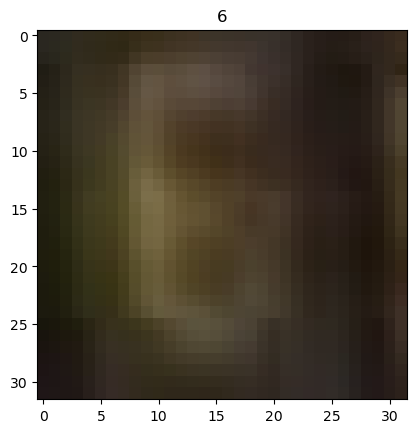

In [29]:
testimages, testlabels = next(iter(test))
plt.imshow(testimages[11].permute(1, 2, 0)* .5 + .5)
plt.title(labels[11].item());